In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
fines = pd.read_csv('../data/fines.csv')
fines_lean = fines.drop(columns = ['Incident Address', 'Trash Hauler', 'Trash Route', 'Council District', 'State Plan X', 'State Plan Y'])
fines_lean['Zip Code'] = fines_lean['Zip Code'].astype('Int64').astype('object')

In [30]:
fines_lean = fines_lean.dropna().groupby('Zip Code').sum().reset_index()

In [31]:
fines_lean

,Zip Code,Missed Count,Fines
0,37013,2096,156600
1,37027,149,9600
2,37076,4,0
3,37086,3,200
4,37115,1084,85000
5,37138,3,0
6,37189,56,5200
7,37201,30,3200
8,37203,343,31600
9,37204,572,46200


C:\Users\user\AppData\Local\Temp\ipykernel_1376\669682401.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


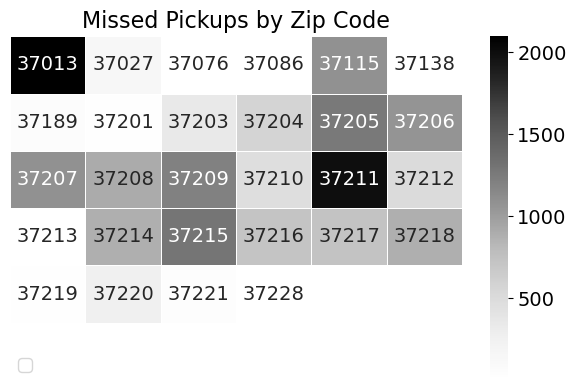

C:\Users\user\AppData\Local\Temp\ipykernel_1376\669682401.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


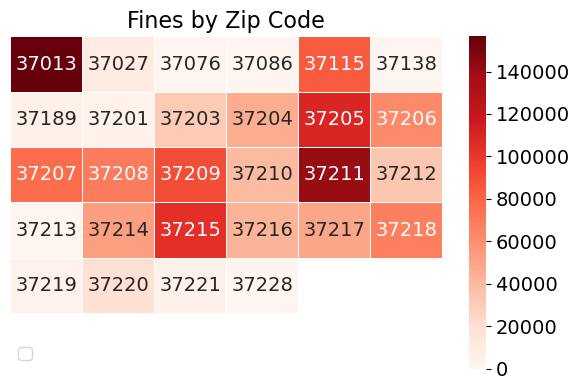

In [42]:
# --- Step 1: Arrange ZIP codes into a square-ish grid ---
n = int(np.ceil(np.sqrt(len(fines_lean))))  # grid size

# pad with NaN if needed
padded_missed = fines_lean["Missed Count"].tolist() + [np.nan] * (n**2 - len(fines_lean))
padded_fines = fines_lean["Fines"].tolist() + [np.nan] * (n**2 - len(fines_lean))
padded_zips = fines_lean["Zip Code"].tolist() + [""] * (n**2 - len(fines_lean))

missed_matrix = np.array(padded_missed).reshape(n, n)
fines_matrix = np.array(padded_fines).reshape(n, n)
zip_matrix = np.array(padded_zips).reshape(n, n)

# --- Step 2: Missed Count Heatmap ---
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    missed_matrix,
    cmap="Greys",
    annot=zip_matrix,  # annotate with zip codes
    annot_kws={'size': 14},
    fmt="",
    cbar=True,
    linewidths=.5
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.ax.yaxis.get_label().set_fontsize(16)
plt.title("Missed Pickups by Zip Code", fontsize=16)
plt.legend(fontsize=12)
plt.axis('off'),
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig('../visualizations/missed_by_zip.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# --- Step 3: Fines Heatmap ---
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    fines_matrix,
    cmap="Reds",
    annot=zip_matrix,
    annot_kws={'size': 14},
    fmt="",
    cbar=True,
    linewidths=.5
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.ax.yaxis.get_label().set_fontsize(16) 
plt.title("Fines by Zip Code", fontsize=16)
plt.legend(fontsize=12)
plt.axis('off')
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig('../visualizations/fines_by_zip.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

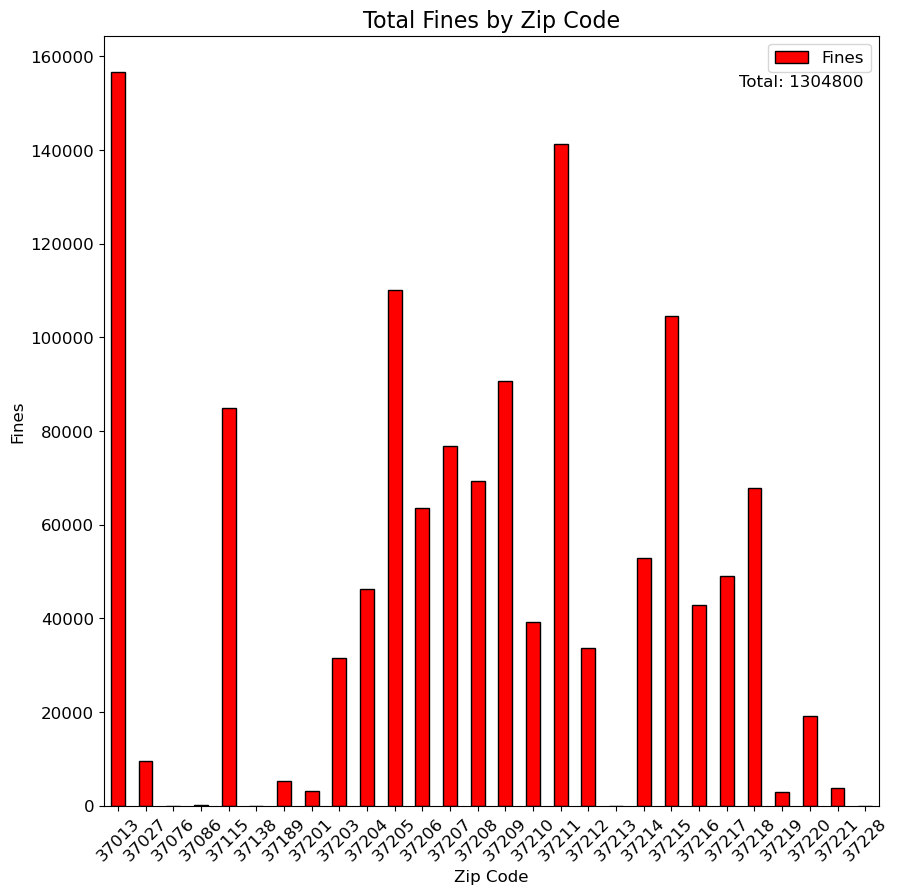

In [43]:
fines_lean.plot(
    figsize=(10, 10),
    x='Zip Code',
    y='Fines',
    kind='bar',
    color='red', 
    edgecolor='black')

total_fines = fines_lean["Fines"].sum()

plt.text(
    0.98, 0.95, f"Total: {total_fines}", 
    transform=plt.gca().transAxes,  # relative to axes
    ha="right", va="top",
    fontsize=12
)

plt.title('Total Fines by Zip Code', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Fines', fontsize=12)
plt.savefig('../visualizations/fines_bar.png', bbox_inches='tight', pad_inches=0.1)

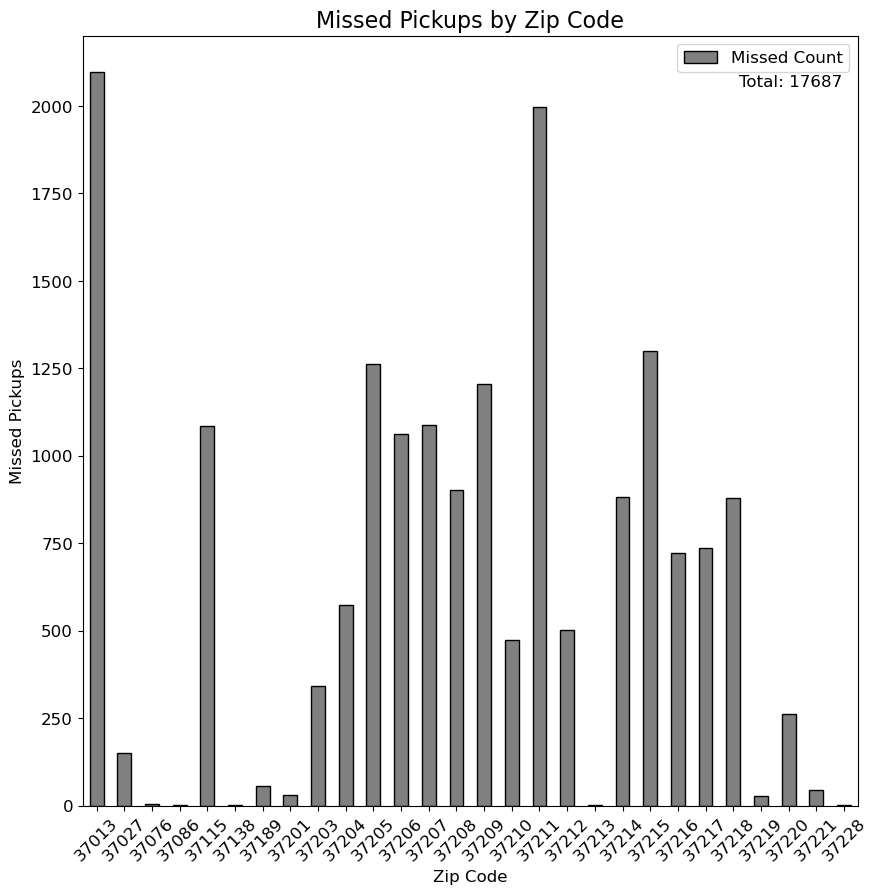

In [44]:
fines_lean.plot(
    figsize=(10, 10),
    x='Zip Code',
    y='Missed Count',
    kind='bar',
    title='Missed Pickups by Zip Code',
    color='gray', 
    edgecolor='black')

total_missed = fines_lean["Missed Count"].sum()

plt.text(
    0.98, 0.95, f"Total: {total_missed}", 
    transform=plt.gca().transAxes,  # relative to axes
    ha="right", va="top",
    fontsize=12
)

plt.title('Missed Pickups by Zip Code', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Missed Pickups', fontsize=12)
plt.savefig('../visualizations/missed_trash_bar.png', bbox_inches='tight', pad_inches=0.1)